# Tratamento da base de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io

In [8]:
# header 1 para tirar os x1, x2,x3..
base_cred = pd.read_csv('credit_card_clients.csv', header =1)
base_cred

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
base_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [10]:
base_cred.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


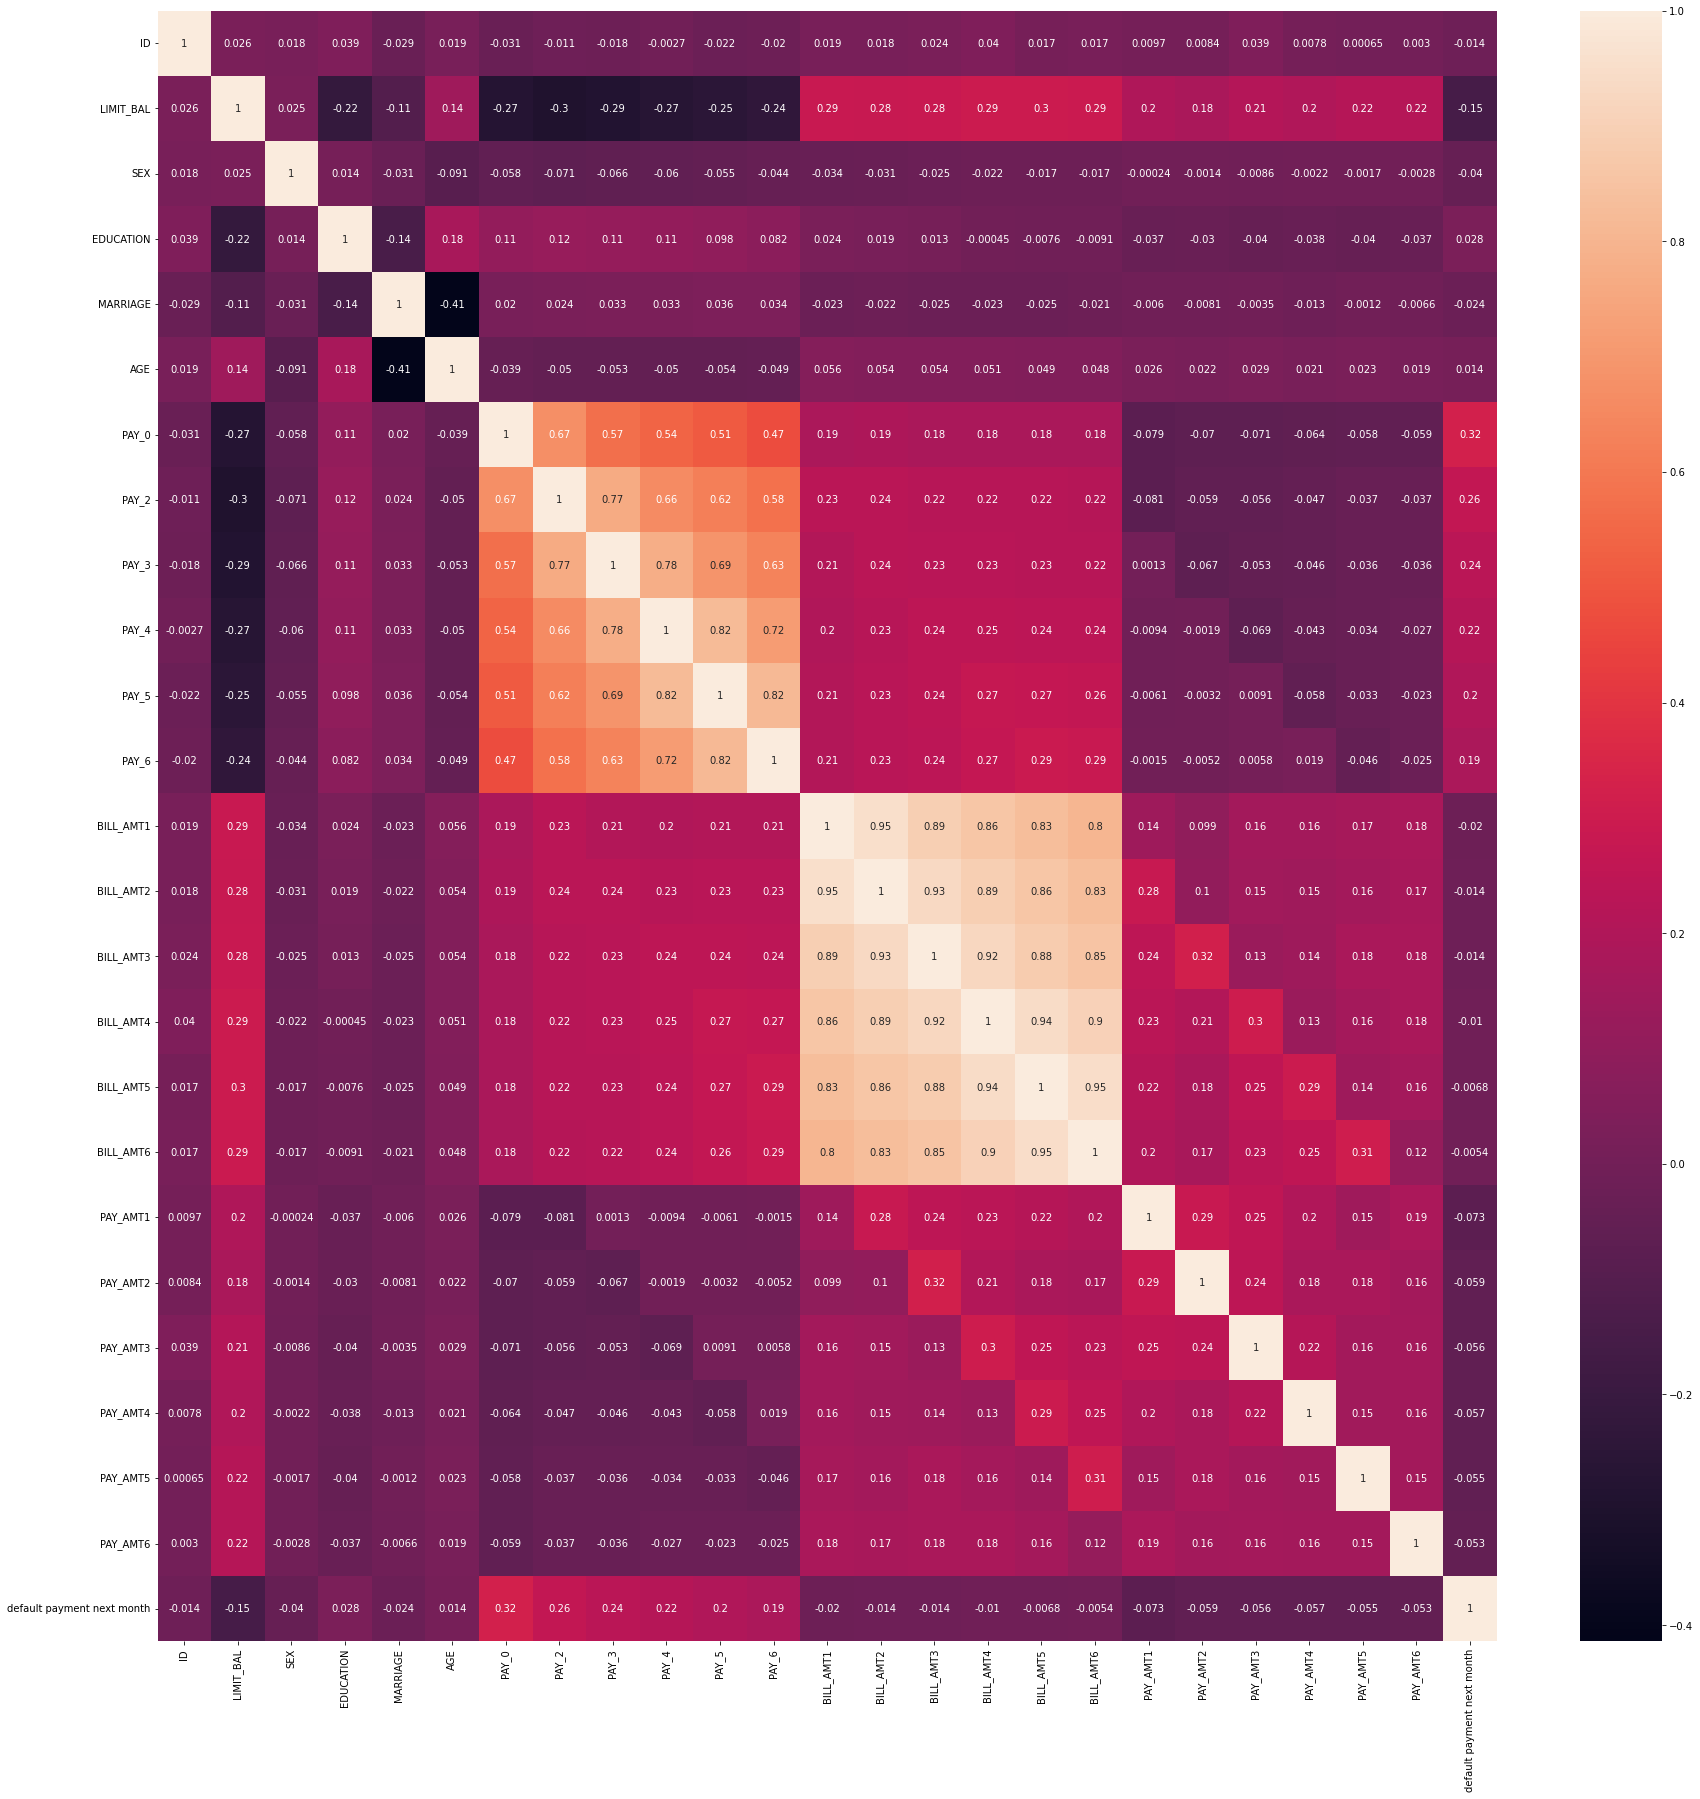

In [13]:
figura = plt.figure(figsize=(30,30))
sns.heatmap(base_cred.corr(), annot=True)
plt.show()

In [14]:
base_cred.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [19]:
X = base_cred.iloc[:,1:len(base_cred.columns)].values

In [20]:
base_cred.iloc[:,1:len(base_cred.columns)].values

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [ 30000,      1,      2, ...,   2000,   3100,      1],
       [ 80000,      1,      3, ...,  52964,   1804,      1],
       [ 50000,      1,      2, ...,   1000,   1000,      1]])

In [21]:
X.shape

(30000, 24)

In [22]:
X[0]

array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0,     1])

In [25]:
X = np.array(X).astype('float32')
X[0]

array([ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
        2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
       -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00], dtype=float32)

# Configurações do Sagemaker

In [26]:
import sagemaker
import boto3
from sagemaker import Session

In [28]:
session = sagemaker.Session()
bucket = 'cursoawssagemakersp'
subpasta_modelo = 'modelos/credit-card/pca'
subpasta_dataset = 'datasets/credit-card'
key_train = 'credit-card-train-data-pca'
role = sagemaker.get_execution_role()
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key_train)
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)

print('Role', role)
print('Localização da base de dados de treinamento', s3_train_data)
print('Modelo final será salvo em:', output_location)

Role arn:aws:iam::605390214759:role/service-role/AmazonSageMaker-ExecutionRole-20230311T091643
Localização da base de dados de treinamento s3://cursoawssagemakersp/datasets/credit-card/train/credit-card-train-data-pca
Modelo final será salvo em: s3://cursoawssagemakersp/modelos/credit-card/pca/output


In [30]:
import sagemaker.amazon.common as smac

buffer = io.BytesIO()
smac.write_numpy_to_dense_tensor(buffer, X)
buffer.seek(0)

0

In [33]:
boto3.resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key_train)).upload_fileobj(buffer)

# Treinamento do PCA

In [34]:
container = sagemaker.image_uris.retrieve(framework = 'pca', region = boto3.Session().region_name)

In [35]:
container

'855470959533.dkr.ecr.sa-east-1.amazonaws.com/pca:1'

In [38]:
pca = sagemaker.estimator.Estimator(image_uri = container,
                                   role = role,
                                   instance_count=1,
                                   instance_type = 'ml.c4.xlarge',
                                   output_path = output_location,
                                   sagemaker_session=session)

In [39]:
# feature_dim = quantidade de linhas
# mini_batch_size = numero de linhas que sera usada para o treinamento, ex 200 será enviado de 200 em 200 linhas
#num_components =  numero de componentes 
pca.set_hyperparameters(feature_dim=30000,
                       num_components=2,
                       mini_batch_size=200)

In [40]:
pca.fit({'train': s3_train_data})

2023-03-28 20:30:30 Starting - Starting the training job...ProfilerReport-1680035430: InProgress
......
2023-03-28 20:32:01 Starting - Preparing the instances for training......
2023-03-28 20:33:01 Downloading - Downloading input data...
2023-03-28 20:33:21 Training - Downloading the training image......
2023-03-28 20:34:30 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/28/2023 20:34:42 INFO 139824474195776] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[03/28/2023 20:34:42 INFO 139824474195776] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'feature_d

# Redução de dimensionalidade

In [41]:
pca_predictor = pca.deploy(initial_instance_count=1, instance_type = 'ml.c4.xlarge')

-------!

In [42]:
from sagemaker.serializers import CSVSerializer # CSVSerializer(formato que o modelo recebe)
from sagemaker.deserializers import JSONDeserializer 

pca_predictor.serializer = CSVSerializer()
pca_predictor.deserializer = JSONDeserializer()

In [43]:
X[0]

array([ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
        2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
       -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00], dtype=float32)

In [45]:
X0_pca = pca_predictor.predict(X[0])
print(X0_pca)

{'projections': [{'projection': [75538.1015625, 166488.15625]}]}


In [46]:
X_pca = pca_predictor.predict(X)

In [47]:
X_pca

{'projections': [{'projection': [75538.1015625, 166488.15625]},
  {'projection': [-9780.703125, 114226.9296875]},
  {'projection': [33471.33984375, 98432.3203125]},
  {'projection': [95224.2421875, 71230.6484375]},
  {'projection': [68729.1484375, 114834.59375]},
  {'projection': [97913.75, 67063.484375]},
  {'projection': [196044.703125, -1027202.3125]},
  {'projection': [7202.8203125, 124842.328125]},
  {'projection': [-17128.375, 86857.71875]},
  {'projection': [78307.703125, 160662.734375]},
  {'projection': [-75357.375, 68122.71875]},
  {'projection': [-117693.03125, 18680.234375]},
  {'projection': [-448067.625, -145862.203125]},
  {'projection': [99842.3203125, 22732.03125]},
  {'projection': [-50677.234375, -76998.828125]},
  {'projection': [87440.390625, 84486.765625]},
  {'projection': [94949.359375, 131950.65625]},
  {'projection': [10259.046875, -338039.125]},
  {'projection': [-221639.75, 2328.25]},
  {'projection': [-65215.6875, 90814.6015625]},
  {'projection': [3945.570

In [48]:
X_pca = np.array([r['projection'] for r in X_pca['projections']])

In [49]:
X_pca

array([[ 75538.1015625 , 166488.15625   ],
       [ -9780.703125  , 114226.9296875 ],
       [ 33471.33984375,  98432.3203125 ],
       ...,
       [ 77857.4609375 , 140206.109375  ],
       [ 74908.3046875 ,  41427.71875   ],
       [ 95514.109375  ,  70860.2890625 ]])

In [50]:
X_pca.shape

(30000, 2)

In [51]:
X_pca = np.array(X_pca).astype('float32')

In [54]:
X_pca

array([[ 75538.1  , 166488.16 ],
       [ -9780.703, 114226.93 ],
       [ 33471.34 ,  98432.32 ],
       ...,
       [ 77857.46 , 140206.11 ],
       [ 74908.305,  41427.72 ],
       [ 95514.11 ,  70860.29 ]], dtype=float32)

# Treinamento do k-means

In [55]:
subapasta_modelo_kmeans =  'modelos/credit-card/kmeans'
output_location_kmeans =  's3://{}/{}'.format(bucket, subapasta_modelo_kmeans)
print('Modelo kmenas será salvo em: ', output_location_kmeans)

Modelo kmenas será salvo em:  s3://cursoawssagemakersp/modelos/credit-card/kmeans


In [56]:
from sagemaker import KMeans

In [57]:
kmeans = KMeans(role=role,
               instance_count=1,
               instance_type = 'ml.c4.xlarge',
               output_path = output_location_kmeans,
               k=4)

In [58]:
kmeans.fit(kmeans.record_set(X_pca))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2023-03-28 21:08:57 Starting - Starting the training job...
2023-03-28 21:09:25 Starting - Preparing the instances for trainingProfilerReport-1680037737: InProgress
......
2023-03-28 21:10:28 Downloading - Downloading input data...
2023-03-28 21:10:57 Training - Downloading the training image.........
2023-03-28 21:12:17 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[03/28/2023 21:12:21 INFO 140174990821184] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 'force_dense': 'true', '_disable_wait_to_read': 'false', '_enable_

# Agrupamento com k-means

In [59]:
kmeans_predictor = kmeans.deploy(initial_instance_count = 1, instance_type = 'ml.c4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-------!

In [62]:
resultados = kmeans_predictor.predict(X_pca)

In [63]:
resultados

[label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 78895.0703125
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 62628.7890625
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 16589.5234375
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "distance_to_cluster"
   value {
     float32_tensor {
       values: 50900.60546875
     }
   }
 },
 label {
   key: "closest_cluster"
   value {
     float32_tensor {
       values: 1.0
     }
   }
 }
 label {
   key: "dis

In [64]:
rotulos = [r.label['closest_cluster'].float32_tensor.values[0] for r in resultados]

In [65]:
print(rotulos)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0,

In [66]:
np.unique(rotulos, return_counts=True)

(array([0., 1., 2., 3.]), array([ 4620, 16480,  7728,  1172]))

In [67]:
base_cred.shape, len(rotulos)

((30000, 25), 30000)

In [68]:
base_cred['cluster'] = rotulos

In [69]:
base_cred

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1.0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,0.0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,1.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,1.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,1.0


<AxesSubplot:xlabel='LIMIT_BAL', ylabel='BILL_AMT5'>

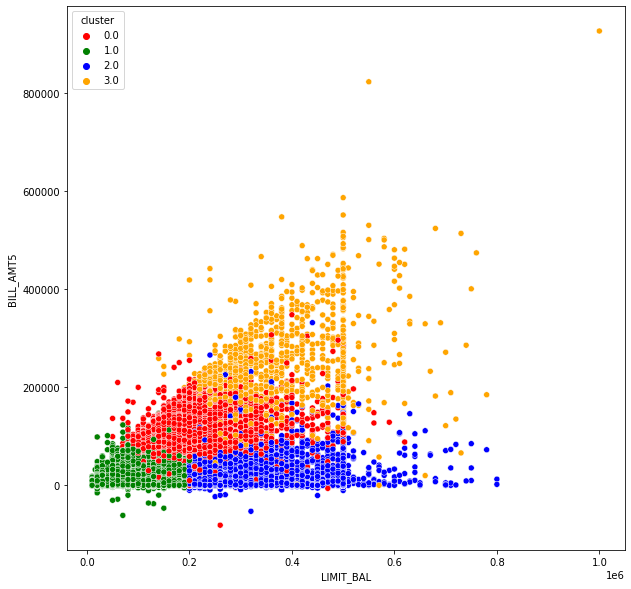

In [72]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= 'LIMIT_BAL', y = 'BILL_AMT5', data=base_cred, hue='cluster', palette = ['red', 'green', 'blue', 'orange'])

In [77]:
base_cred['cluster'].value_counts()

1.0    16480
2.0     7728
0.0     4620
3.0     1172
Name: cluster, dtype: int64

In [78]:
base_credit_3 = base_cred[base_cred['cluster'] == 3.0]
base_credit_3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,3.0
40,41,360000,1,1,2,33,0,0,0,0,...,195969,179224,10000,7000,6000,188840,28000,4000,0,3.0
59,60,400000,2,2,1,29,0,0,0,0,...,356656,364089,17000,15029,30000,12000,12000,23000,0,3.0
102,103,480000,1,1,1,63,0,0,0,2,...,471145,469961,16078,55693,17000,0,18000,24200,0,3.0
123,124,310000,2,2,1,35,2,0,0,0,...,246491,198889,13019,11128,8407,8599,6833,5987,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29884,29885,350000,1,3,1,31,1,2,2,0,...,143062,224387,11000,0,5500,5000,100000,0,0,3.0
29921,29922,410000,1,1,2,34,0,0,0,-1,...,1421,-15,17259,18600,1474,1428,0,0,1,3.0
29963,29964,610000,1,1,2,31,0,-1,2,-1,...,248893,269528,323014,1605,349395,250144,271099,220076,0,3.0
29978,29979,310000,1,2,1,39,0,0,0,0,...,216540,210675,10029,9218,10029,8049,8040,10059,0,3.0


In [79]:
base_credit_3.to_csv('base_credi_3.csv')

In [80]:
# treinamento e inferencia
import mxnet as mx

In [82]:
os.system('tar -zxvf model.tar.gz')

0

In [83]:
centroides = mx.ndarray.load('model_algo-1')

In [84]:
centroides

[
 [[  55521.9   -171446.25 ]
  [  48861.734   92239.89 ]
  [-166241.16    -6446.676]
  [ 110675.46  -570295.   ]]
 <NDArray 4x2 @cpu(0)>]